In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import f1_score
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import StratifiedKFold
from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'keras'

In [ ]:
hcc_data = pd.read_csv(r'data/hcc-data-complete-balanced.csv')

In [ ]:
df = hcc_data.copy()

In [ ]:
# df.info()

In [ ]:
df.describe().transpose()

No missing values in dataset

##### 1. Data clean up – feature engineering

In [ ]:
# Changing ',' to '.'

df = df.replace('\,','.', regex=True)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df.head(10)

In [ ]:
obj_columns = ['Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'TP', 'Creatinine', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', "Ferritin"]
df[obj_columns] = round(df[obj_columns].astype('float'),2)

In [ ]:
df.describe().transpose()

we see the max values of many features looks like outliers so, we visualize them to get more details. 

In [ ]:
obj_columns.append('Class')

In [ ]:
sns.pairplot(df[obj_columns])

In [ ]:
df_cols = list(df.columns)
import matplotlib.pyplot as plt
for cols in df_cols:
    sns.scatterplot(data = df, x = cols, y = 'Class')
    plt.show()

From scatter plot we can estimate features with the outliers

In [ ]:
df[df['Grams_day'] > 450]

In [2]:
df[df['Packs_year'] > 200]

NameError: name 'df' is not defined

In [3]:
df[df['INR'] > 4.5]

NameError: name 'df' is not defined

In [4]:
df[df['AFP'] > 150000]

NameError: name 'df' is not defined

In [5]:
df[df['Leucocytes'] > 12000]

NameError: name 'df' is not defined

In [6]:
df[df['ALT'] > 350]

NameError: name 'df' is not defined

In [19]:
df[df['AST'] > 500]

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
41,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,66,0,0.0,0,1,1,1.21,2.8,15.7,92.7,15.4,188000.0,4.1,0.7,299,553,196,68,6.5,1.30,1,5.0,0.3,52.5,37.0,856.0,1
54,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,51,100,30.0,3,1,2,1.35,1898.0,12.4,95.1,9.8,216.0,2.7,8.2,164,523,433,397,6.7,0.82,1,2.1,5.5,56.0,27.0,742.0,0


In [20]:
df[df['ALP'] > 800]

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
29,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,20,100,2.0,1,1,1,1.21,1.9,9.9,83.4,8.1,556.00,3.20,1.80,150,112,599,974,7.7,0.70,5,3.2,1.10,22.0,7.0,369.0,1
55,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,78,0,0.0,1,1,1,1.32,77.0,10.8,88.0,6000.0,174000.00,3.20,0.90,48,19,171,923,5.4,1.31,3,15.4,0.12,14.0,5.0,149.0,0
120,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,63,0,0.0,1,1,1,1.14,14177.0,10.2,96.1,6000.0,109000.00,2.60,4.90,70,113,833,980,7.5,0.78,5,9.0,2.80,0.0,0.0,0.0,1
167,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,78,4,1.0,1,1,1,1.39,79.1,10.8,88.0,5885.5,174381.93,3.21,0.96,51,20,185,913,5.4,1.30,3,15.4,0.15,15.5,5.0,147.0,0


In [21]:
# outlier rows
outlier_ind = [19,128,173,23,42,71,125,33,106,41,54,29,55,120,167]

In [22]:
df = df.drop(outlier_ind)
df =df.reset_index()

In [23]:
# Scaling the data aids the training of neural nets by providing numerical stability 
df_scaled=preprocessing.scale(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Class']=df['Class']
df=df_scaled

In [24]:
df['Class'] = df['Class'].astype('float32')
df = df.drop(columns = 'index')

In [25]:
# Split the data into a training and testing set
X=df.loc[:, df.columns!='Class']
y=df.loc[:,'Class']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [26]:
print(y_train.value_counts())
print(y_test.value_counts())

1.0    78
0.0    73
Name: Class, dtype: int64
0.0    20
1.0    18
Name: Class, dtype: int64


##### 2. Impute the missing values with mean, median and mode. You need to evaluate which method is better based on the F1 score.

In [27]:
print(f"Missing data: {df.isna().sum(axis=0).any()}")

Missing data: False


 - There are no values missing in dataset

##### 3. Build a neural network with at least 3 hidden layers and 4 neurons each. Train and test.

In [28]:
# Build neural network in Keras
model=Sequential()
model.add(Dense(4, activation='relu', input_dim=49))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
history = model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs=20, verbose=False)

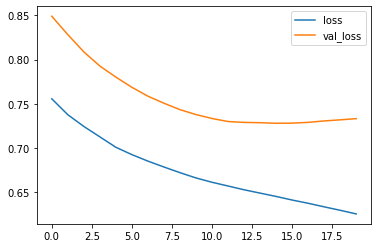

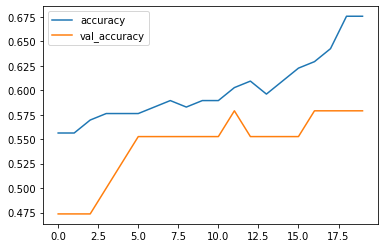

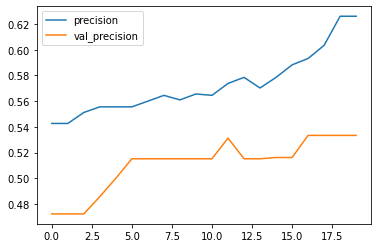

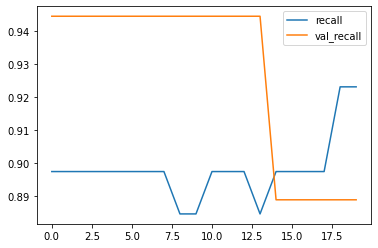

In [29]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:, ['precision', 'val_precision']].plot();
history_frame.loc[:, ['recall', 'val_recall']].plot();

In [30]:
# Results
scores=model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {round((scores[1]*100),2)} Precision: {round((scores[2]*100),2)}")
scores=model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy : {round((scores[1]*100),2)} Precision: {round((scores[2]*100),2)}")

Precision = scores[1]*100
Recall = scores[2]*100
f1 = float(2 * (Precision * Recall) / (Precision + Recall))
print(f"F1 Score: {f1}")

Training Accuracy: 67.55 Precision: 62.61
Testing Accuracy : 57.89 Precision: 53.33
F1 Score: 55.520506094791955


 - Looks like losses are going down in both train and test set, by tuning we may get better results

##### 4. Which activation functions are you using? Why?

 - Used Relu in hiden layers as it is widely used for non-linear data.
 - ReLu is also less computationally expensive than others because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.
 - Since we need binary classifiactions we use sigmoid for our output layer.

##### 5. Tune the hyperparameters using cross-validation and see what precision you can achieve

In [31]:
# define 10-fold cross validation test harness for hyperparameter tuning

def model_tune(optimizer,epo,bs,n1,n2,n3):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    cvscores = []
    for train, test in kfold.split(X, y):

        model=Sequential()
        model.add(Dense(n1, activation='relu', input_dim=49))
        model.add(Dense(n2, activation='relu'))
        model.add(Dense(n3, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
        model.fit(X_train, y_train, epochs=epo,batch_size = bs, verbose=False)

        scores = model.evaluate(X_test, y_test, verbose=0)
        print(f"Accuracy: {round((scores[1]*100),2)}   Precision: {round((scores[2]*100),2)}")
        Precision = scores[1]*100
        Recall = scores[2]*100
        f1 = float(2 * (Precision * Recall) / (Precision + Recall))
        print(f"F1 Score: {round(f1,2)}")
        cvscores.append(scores[1] * 100)
    print("Mean CVScore: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [42]:
model_tune('adam',50,20,50,50,50)

Accuracy: 76.32   Precision: 80.0
F1 Score: 78.11
Accuracy: 76.32   Precision: 90.91
F1 Score: 82.98
Accuracy: 78.95   Precision: 85.71
F1 Score: 82.19
Accuracy: 76.32   Precision: 80.0
F1 Score: 78.11
Accuracy: 71.05   Precision: 70.59
F1 Score: 70.82
Accuracy: 73.68   Precision: 75.0
F1 Score: 74.34
Accuracy: 78.95   Precision: 91.67
F1 Score: 84.83
Accuracy: 81.58   Precision: 78.95
F1 Score: 80.24
Accuracy: 76.32   Precision: 80.0
F1 Score: 78.11
Accuracy: 73.68   Precision: 75.0
F1 Score: 74.34
Mean CVScore: 76.32% (+/- 2.88%)


In [33]:
model_tune('SGD',30,10,100,70,50)

Accuracy: 71.05   Precision: 70.59
F1 Score: 70.82
Accuracy: 84.21   Precision: 87.5
F1 Score: 85.82
Accuracy: 71.05   Precision: 73.33
F1 Score: 72.17
Accuracy: 65.79   Precision: 64.71
F1 Score: 65.24
Accuracy: 68.42   Precision: 65.0
F1 Score: 66.67
Accuracy: 68.42   Precision: 65.0
F1 Score: 66.67
Accuracy: 78.95   Precision: 77.78
F1 Score: 78.36
Accuracy: 68.42   Precision: 68.75
F1 Score: 68.59
Accuracy: 76.32   Precision: 80.0
F1 Score: 78.11
Accuracy: 81.58   Precision: 78.95
F1 Score: 80.24
Mean CVScore: 73.42% (+/- 6.05%)


In [34]:
model_tune('Adamax',20,10,100,100,100)

Accuracy: 76.32   Precision: 80.0
F1 Score: 78.11
Accuracy: 76.32   Precision: 84.62
F1 Score: 80.25
Accuracy: 76.32   Precision: 84.62
F1 Score: 80.25
Accuracy: 76.32   Precision: 76.47
F1 Score: 76.39
Accuracy: 73.68   Precision: 75.0
F1 Score: 74.34
Accuracy: 71.05   Precision: 70.59
F1 Score: 70.82
Accuracy: 76.32   Precision: 76.47
F1 Score: 76.39
Accuracy: 71.05   Precision: 70.59
F1 Score: 70.82
Accuracy: 86.84   Precision: 93.33
F1 Score: 89.97
Accuracy: 76.32   Precision: 73.68
F1 Score: 74.98
Mean CVScore: 76.05% (+/- 4.15%)


In [44]:
model_tune('Adam',200,20,196,98,49)

Accuracy: 71.05   Precision: 70.59
F1 Score: 70.82
Accuracy: 84.21   Precision: 92.86
F1 Score: 88.32
Accuracy: 81.58   Precision: 86.67
F1 Score: 84.05
Accuracy: 78.95   Precision: 81.25
F1 Score: 80.08
Accuracy: 84.21   Precision: 87.5
F1 Score: 85.82
Accuracy: 78.95   Precision: 81.25
F1 Score: 80.08
Accuracy: 76.32   Precision: 76.47
F1 Score: 76.39
Accuracy: 73.68   Precision: 75.0
F1 Score: 74.34
Accuracy: 78.95   Precision: 81.25
F1 Score: 80.08
Accuracy: 84.21   Precision: 92.86
F1 Score: 88.32
Mean CVScore: 79.21% (+/- 4.32%)


 - After tuning we get the best model from Adam optimizer with 198,98,49 neurons for the hidden layers

##### 6. Is using Adam optimization and early stopping helpful in this problem? Why?

Epoch 00002: early stopping


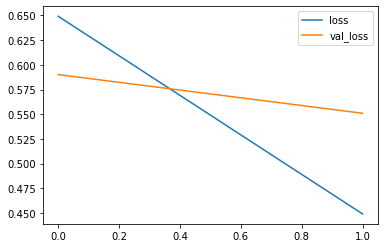

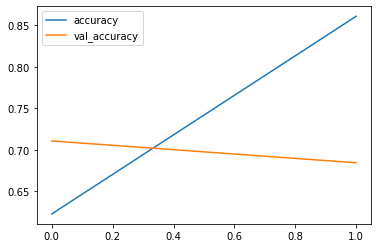

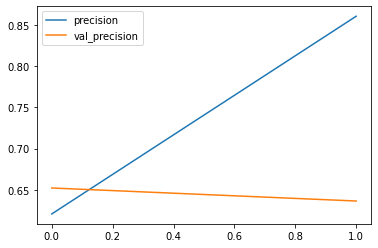

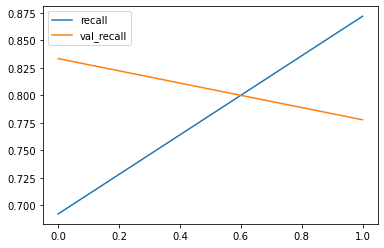

In [45]:
optimizer = 'Adam'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

model=Sequential()
model.add(Dense(198, activation='relu', input_dim=49))
model.add(Dense(98, activation='relu'))
model.add(Dense(49, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
history = model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs=100,batch_size = 10, verbose=False, callbacks=[es])

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:, ['precision', 'val_precision']].plot();
history_frame.loc[:, ['recall', 'val_recall']].plot();

In [46]:
# Results 
scores=model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {round((scores[1]*100),2)}   Precision: {round((scores[2]*100),2)}")
scores=model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy : {round((scores[1]*100),2)}   Precision: {round((scores[2]*100),2)}")

Precision = scores[1]*100
Recall = scores[2]*100
f1 = float(2 * (Precision * Recall) / (Precision + Recall))
print(f"F1 Score:  {round(f1,2)}")

Training Accuracy: 92.72   Precision: 91.36
Testing Accuracy : 68.42   Precision: 63.64
F1 Score:  65.94


 - Adam optimizer gave better results in the CVscores but when Early stopping was added it did not perform well.

###### 7. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?

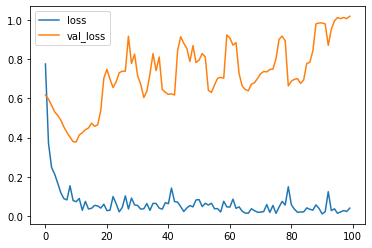

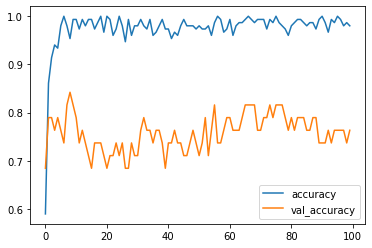

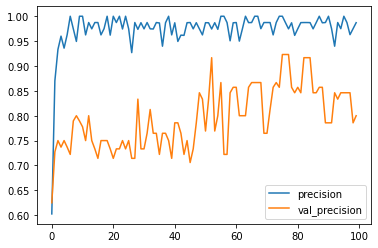

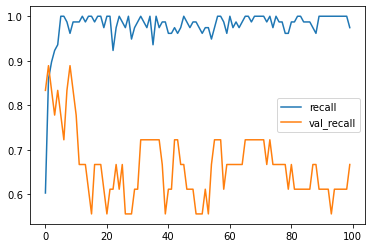

In [47]:
optimizer = 'Adam'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

model=Sequential()
model.add(Dense(196, activation='relu', input_dim=49))
model.add(BatchNormalization())
model.add(Dense(98, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(49, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
history = model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs=100,batch_size=10, verbose=False, callbacks=[es])

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:, ['precision', 'val_precision']].plot();
history_frame.loc[:, ['recall', 'val_recall']].plot();

In [48]:
# Results 

scores=model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {round((scores[1]*100),2)}   Precision: {round((scores[2]*100),2)}")
scores=model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy : {round((scores[1]*100),2)}   Precision: {round((scores[2]*100),2)}")

Precision = scores[1]*100
Recall = scores[2]*100
f1 = float(2 * (Precision * Recall) / (Precision + Recall))
print(f"F1 Score:  {round(f1,2)}")

Training Accuracy: 100.0   Precision: 100.0
Testing Accuracy : 76.32   Precision: 80.0
F1 Score:  78.11


 - The batch normalization layer normalizes the values passed to it for every batch. 
 - This is similar to standard scaler in conventional Machine Learning.
 - It obtained better results and also F1 score was much better.
 - But we see overfitting
 - Comparing the learning curves there seems to be no converging and the loss seems to be uneven

##### 8. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?

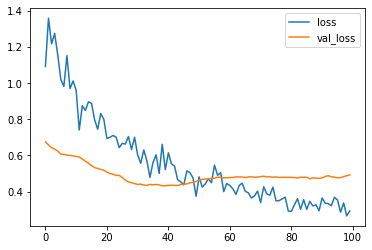

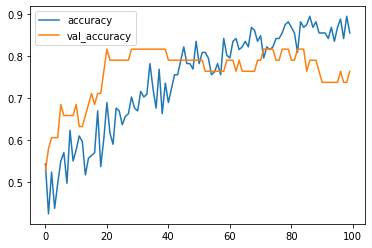

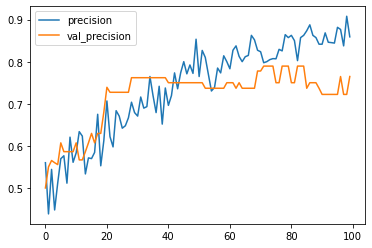

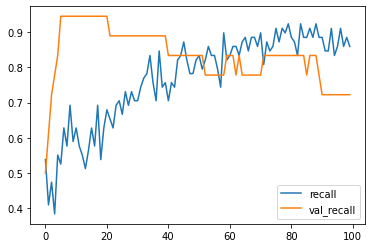

In [49]:
optimizer = 'Adam'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
dropout_rate = 0.7

model=Sequential()
model.add(Dense(196, activation='relu', input_dim=49))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(98, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(49, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy','Precision','Recall'])
history = model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs=100,batch_size=10, verbose=False, callbacks=[es])

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:, ['precision', 'val_precision']].plot();
history_frame.loc[:, ['recall', 'val_recall']].plot();

In [50]:
# Results 

scores=model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {round((scores[1]*100),2)}   Precision: {round((scores[2]*100),2)}")
scores=model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy : {round((scores[1]*100),2)}   Precision: {round((scores[2]*100),2)}")

Precision = scores[1]*100
Recall = scores[2]*100
f1 = float(2 * (Precision * Recall) / (Precision + Recall))
print(f"F1 Score:  {round(f1,2)}")

Training Accuracy: 98.01   Precision: 96.3
Testing Accuracy : 76.32   Precision: 76.47
F1 Score:  76.39


 - The dropout layer, randomly drops a certain number of neurons in a layer. 
 - The dropped neurons are not used anymore.
 - The rate of how much percentage of neurons to drop is set to 0.7 in the dropout rate.
 - With that we see a slight reduction in overfitting.

##### 9. What is the final model you’ve arrived? Draw the neural network to explain your solution.

In [51]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_268 (Dense)           (None, 196)               9800      
                                                                 
 batch_normalization_12 (Bat  (None, 196)              784       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 196)               0         
                                                                 
 dense_269 (Dense)           (None, 98)                19306     
                                                                 
 batch_normalization_13 (Bat  (None, 98)               392       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 98)              

 - The final model is the model with Dropout and batchnormalization, though there seems to be overfiiting it performed better compared to other models with F1 score and accuracy.
 - In this model the input dimension is set to 49 as we have 49 features in our dataset.
 - Neurons in the hidden layer are 196, 98, 49 which was estimated by cross validation.
 - We added batch normalization and drop out for every layer to prevent overfitting.
 - Though the F1 score was better when compared to the previous model, it had less overfitting comparitively.

##### 10. Mention your F-1 score for each development in your model

F1 Scores:
  - Pdf Model: 55.5
  - Early stopping model: 65.9
  - Batch Normalization model: 78.1
  - Dropout model: 76.3
        